# Project: Investigate a Dataset  about movies

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

In this project we'll be looking for the characteristics to achieve a successful film.
So we'll be looking for:

We'll try to identify how are the most profitable movies (revenue/budget).





    


<a id='intro'></a>
## Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas.plotting import scatter_matrix
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> Here we'll eliiminate duplicate rows and also columns that will not be useful

In [5]:
df = pd.read_csv(r'C:\Users\mrodriguezs\OneDrive\Cursos\Udacity - Data Analytics\Proyecto 3\tmdb-movies.csv',
                 sep=",",
                 parse_dates=['release_date'],dtype={'popularity':str,
                                                    'budget':float,
                                                    'revenue':float})
df['popularity']=df['popularity'].str.replace('.','').astype(float)


pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.drop_duplicates(inplace=True)
df.drop(columns=['homepage','keywords','tagline','overview', 'budget_adj', 'revenue_adj','release_date'], inplace=True)

>To continue, we will remove null values and rows of numeric variables containing zeros. Then we'll plot numeric variables with box plots

In [3]:
df2=df.copy()
cols=['popularity','budget','revenue', 'runtime','vote_count','vote_average','release_year']
df2.dropna(inplace=True)
for i in cols:
    df2.drop(df2[df2[i]==0].index, inplace=True)

#df2.drop(df2[df2['budget'].between(0,5000000)].index, inplace=True)
df2.drop(df2[df2['popularity'].between(100000000,899763999999999)].index, inplace=True)



def show_titleand(var):
    display(df2[['original_title',var]].sort_values(by=[var], ascending=False).head())
    display(df2[['original_title',var]].sort_values(by=[var], ascending=True).head())
    
#show_titleand('popularity')
#show_titleand('revenue')
#show_titleand('budget')     

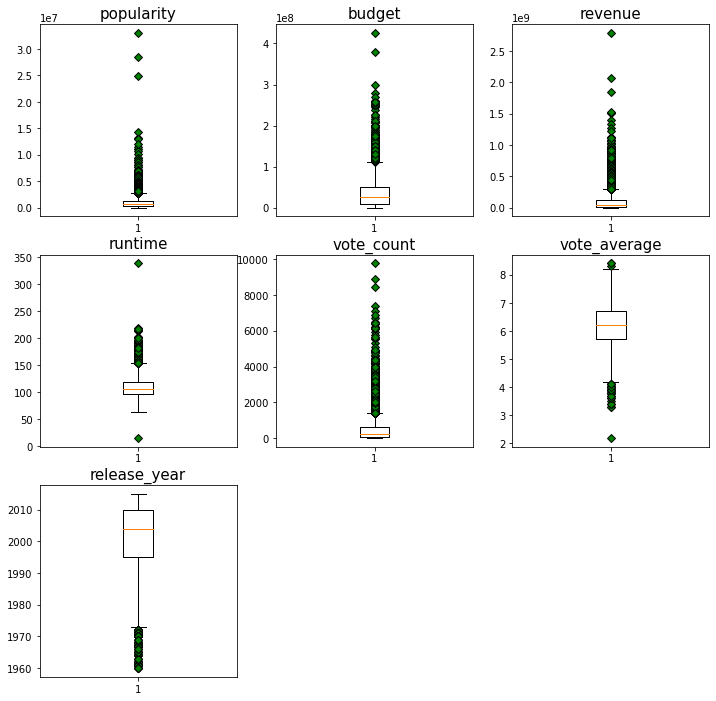

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharey=False)

green_diamond = dict(markerfacecolor='g', marker='D')
count=0
for i in range(3):
    for j in range(3):
        ax=axes[i,j]
        if count < len(cols):
            ax.boxplot(df2[cols[count]], flierprops=green_diamond)
            ax.set_title(cols[count], fontsize=15)                     
        else:
            ax.set_axis_off()
        count+=1
    

### Data Cleaning

> Some outliers were eliminated and nan values. Also, some columns that were not relevant to the analysis were eliminated, as tagline, keywords, etc.

<a id='eda'></a>
## Exploratory Data Analysis

### 1-) How get a profitable movie?


> First, we'll review how the numerical variables are related.

In [5]:
display(df2[['popularity','budget','revenue','runtime','vote_count','vote_average','release_year']].corr())

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.00000,0.40277,0.57475,0.19441,0.71840,0.29497,0.15612
budget,0.40277,1.00000,0.68953,0.26699,0.55870,0.02375,0.27385
revenue,0.57475,0.68953,1.00000,0.25360,0.75484,0.22737,0.14395
runtime,0.19441,0.26699,0.25360,1.00000,0.27744,0.35925,-0.10853
vote_count,0.71840,0.55870,0.75484,0.27744,1.00000,0.39095,0.21488
vote_average,0.29497,0.02375,0.22737,0.35925,0.39095,1.00000,-0.12629
release_year,0.15612,0.27385,0.14395,-0.10853,0.21488,-0.12629,1.00000


In [6]:
display(df2.describe())

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3596.00000,3596.00000,3596.00000,3596.00000,3596.00000,3596.00000,3596.00000,3596.00000
mean,39908.74611,1100090.22497,37830612.31591,109427118.26168,109.38654,538.90545,6.17453,2001.23860
std,67462.50325,1480660.73557,42600846.35044,177190198.45431,19.76837,879.01804,0.78864,11.30238
min,5.00000,1523.00000,1.00000,2.00000,15.00000,10.00000,2.20000,1960.00000
25%,5871.25000,364928.25000,10000000.00000,14350806.75000,96.00000,74.00000,5.70000,1995.00000
50%,11229.50000,724270.00000,25000000.00000,46581132.00000,106.00000,213.00000,6.20000,2004.00000
75%,38762.25000,1317165.50000,50000000.00000,128416041.25000,119.00000,596.75000,6.70000,2010.00000
max,417859.00000,32985763.00000,425000000.00000,2781505847.00000,338.00000,9767.00000,8.40000,2015.00000


> It is possible to identify that revenues is related to popularity, budget and vote_count. so we'll eliminate the others columns. However, given that the number of votes is a consequence of popularity, the number of votes will also be eliminated.

In [7]:
df2.drop(columns=['id','runtime','runtime','release_year','vote_count','vote_average'], inplace=True)

In [8]:
def splitvar(var, df=df2):
    df_gen=df.copy()
    count=0
    for v in var:
        
        cant= max(df_gen[v].str.split('|').apply(lambda x: len(x)))
        columns_newdf=[]
        for c in range(cant):
            columns_newdf.append(v+str(c))

        df_gen[columns_newdf]=pd.DataFrame(df_gen[v].str.split('|').tolist(), index= df_gen.index)
        
        if len(var)>1 and count==0:
            index_newdf=['imdb_id','budget', 'revenue','popularity',var[count+1]]
        elif len(var)>1 and count==1:
            index_newdf=['imdb_id','budget', 'revenue','popularity',var[count-1]+'_splitted']
        else:
            index_newdf=['imdb_id','budget', 'revenue','popularity']
    
        df_gen=pd.melt(df_gen, id_vars=index_newdf, value_vars=columns_newdf)
        df_gen = df_gen.rename(columns={'value': v+'_splitted'})
        df_gen.drop(columns=['variable'], inplace=True)
        df_gen.dropna(how='any', inplace=True )
        count=+1
    lista=[]
    for v in var:
        lista.append(v+'_splitted')
    df_gen=df_gen.groupby(lista,as_index=False ).agg({'imdb_id': lambda x: x.nunique(),
                                      'budget': 'sum',
                                      'revenue':'sum',
                                      'popularity':'sum'})
        
    
    
    df_gen.rename(columns={'imdb_id':'#movies'}, inplace=True)
    df_gen.reset_index(drop=True, inplace=True)
    df_gen['pop/movies']=df_gen['popularity']/df_gen['#movies']
    df_gen['profit_rate']=df_gen['revenue']/df_gen['budget']
    return df_gen

In [9]:
def set_level(df=df2, var='profit_rate'):
    df['profit_rate']=df['revenue']/df['budget']
    bin_edges = [np.percentile(df[var],0),
                 np.percentile(df[var],25) ,
                 np.percentile(df[var],50),
                 np.percentile(df[var],75),
                 np.percentile(df[var],100)]
    bin_names= ['Low','Mod Low','Medium','High']
    df[var+'_level']= pd.cut(df[var], bin_edges, labels=bin_names)
    return df

In [10]:
df2= set_level(df2)
highprofit_df= df2[df2['profit_rate_level']=='High']

display(highprofit_df[['original_title','budget','revenue','profit_rate']].sort_values(by='profit_rate',ascending=False).head(10))

,original_title,budget,revenue,profit_rate
10495,"The Karate Kid, Part II",113.00000,115103979.00000,1018619.28319
6179,Into the Night,114.00000,6700000.00000,58771.92982
3608,From Prada to Nada,93.00000,2500000.00000,26881.72043
7447,Paranormal Activity,15000.00000,193355800.00000,12890.38667
2449,The Blair Witch Project,25000.00000,248000000.00000,9920.00000
3581,"Love, Wedding, Marriage",1.00000,1378.00000,1378.00000
1354,Eraserhead,10000.00000,7000000.00000,700.00000
7277,Pink Flamingos,12000.00000,6000000.00000,500.00000
7178,Super Size Me,65000.00000,28575078.00000,439.61658
242,The Gallows,100000.00000,42664410.00000,426.64410


> The most profitable movies are those that has lower budgets. Then we should check those that do not have such low budgets, therefore, we will draw up to the 25th percentile.

C:\Users\mrodriguezs\.conda\envs\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\mrodriguezs\.conda\envs\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\mrodriguezs\.conda\envs\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\mrodr

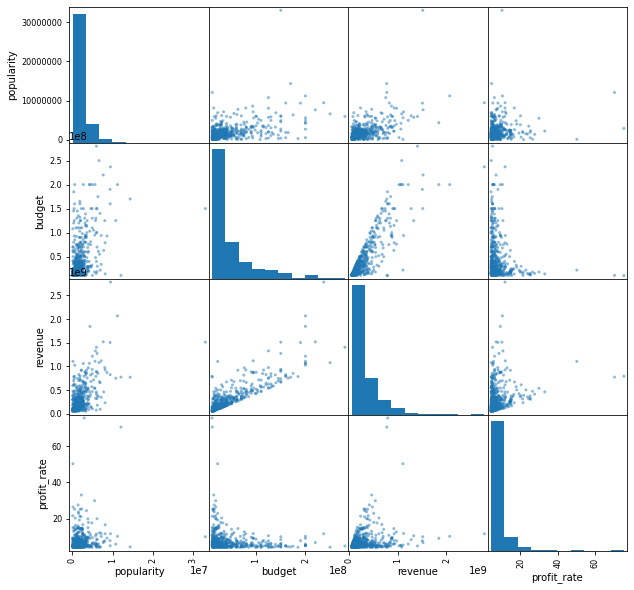

In [11]:
df_budgets= set_level(df2,'budget')

df_budgets=df_budgets[(df_budgets['budget_level']!='Low') & (df_budgets['profit_rate_level']=='High')]

scatter_matrix(df_budgets, figsize=(10,10));

## Most profitable actors

#### Note
>we filter by actors with more than one movie to avoid luck factor.

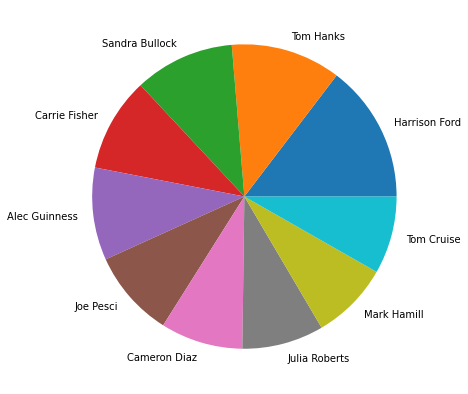

In [12]:
highprofit_df2=df_budgets.copy()

highprofit_df2= splitvar(['cast'],highprofit_df2)

def high_and_order(df, cant=1):
    df['profit_rate_X_#movies']= df['profit_rate']*df['#movies']
    df= df[df['#movies']>1].sort_values(by='profit_rate_X_#movies', ascending=False)
    return df

highprofit_df2=high_and_order(highprofit_df2)

plt.figure(figsize=(7,7))
plt.pie(highprofit_df2['profit_rate_X_#movies'].head(10), labels= highprofit_df2['cast_splitted'].head(10))
plt.show()

>According to the above, without considering the "luck" factor (only 1 film), it is possible to say that in part in order to have a profitable film, it is necessary to have well-known actors.

## Most profiable genres

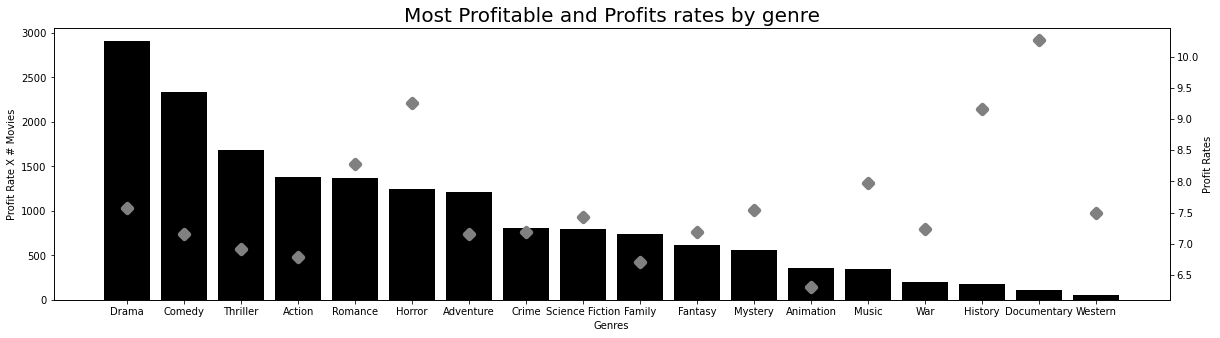

In [13]:
highprofit_genre= df2[df2['profit_rate_level']=='High']

highprofit_genre=splitvar(['genres'],highprofit_genre)

highprofit_genre=high_and_order(highprofit_genre)

plt.figure(figsize=(20,5))
plt.title('Most Profitable and Profits rates by genre', fontsize=20)
plt.bar(highprofit_genre['genres_splitted'],
       highprofit_genre['profit_rate_X_#movies'], color='black')

plt.xlabel('Genres')
plt.ylabel('Profit Rate X # Movies')
axes2 = plt.twinx()
axes2.scatter(highprofit_genre['genres_splitted']
        ,highprofit_genre['profit_rate'], color='grey',linewidth=5, marker ='D')

plt.ylabel('Profit Rates')

plt.show();

>According to the above, without considering the "luck" factor (only 1 film), it is possible to say that in part in order to have a profitable film, it is necessary to have well-known actors.

## Most profiable directors

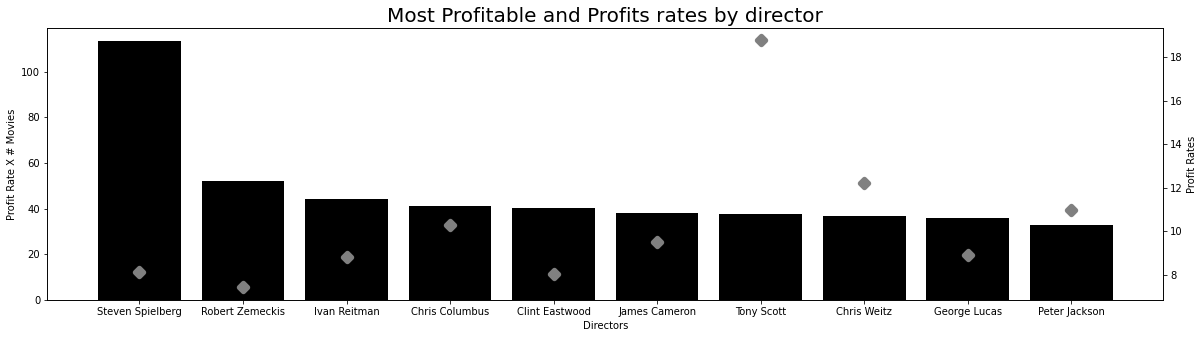

In [14]:
highprofit_dir= df2[df2['profit_rate_level']=='High']
highprofit_dir=highprofit_dir[highprofit_dir['budget_level']!='Low']

highprofit_dir=splitvar(['director'],highprofit_dir)
highprofit_dir=high_and_order(highprofit_dir)



plt.figure(figsize=(20,5))
plt.title('Most Profitable and Profits rates by director', fontsize=20)
plt.bar(highprofit_dir['director_splitted'].head(10),
       highprofit_dir['profit_rate_X_#movies'].head(10), color='black')

plt.xlabel('Directors')
plt.ylabel('Profit Rate X # Movies')
axes2 = plt.twinx()
axes2.scatter(highprofit_dir['director_splitted'].head(10)
        ,highprofit_dir['profit_rate'].head(10), color='grey',linewidth=5, marker ='D')

plt.ylabel('Profit Rates')

plt.show();

#display(highprofit_dir.head(10))

<a id='conclusions'></a>
## Conclusions


>According to the data reviewed, the most profitable films are not the most popular. Apparently the most profitable films (revenue/budget), are those films that despite the low budget, achieve a great story.

>Subsequently, if we review by director and filter out those who have made few films (eliminating the "luck" factor), we can observe a high correlation between revenue, budget and popularity. The highest correlation is between budget and income (0.87).

>In conclusion, it is possible to assume that in order to achieve a successful film, it requires a good story or a good budget. This can be confirmed by the fact that the most profitable actors are also the most famous and something similar happens with directors, and consequently, the cost of the film increases.

>Finally, it should be taken into consideration that this is an exploratory analysis, so to confirm the hypotheses mentioned above, more in-depth analyses are required, such as decision trees to determine which variable is more decisive than another in order to obtain a profitable film. 

### Limitations:

> As we analyzed initially, there is a lot of dispersion in the data. We also found films that have information that does not correspond to reality, thus generating doubts regarding the veracity of the information.
Both problems have a direct influence on the results obtained.
> On the other hand, there is no clarity that the budget and revenue data are all in the same currency, which also affects the results. 

> Although it is a database with a large number of records (10,866), after eliminating empty fields it is reduced to approximately one third (3,596). 
This affects a large part of the database, since lesser-known films are largely those that are eliminated in this step.


> With respect to data that would help complement the study, it would be possible to be more specific with respect to the actors, if in the cast, it were possible to identify the protagonists.

> Another important issue would be to be able to differentiate from the budget, how much corresponds to marketing and how much to production, in order to establish whether the investment in production or marketing is worth it.